# Mental Health in Tech survey

**The main goal of this notebook is to determine if a person needs treatment for his/her mental condition based on the provided data.**


**1. Exploring the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./datasets_311_673_survey.csv')

In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# printing the features of the dataset
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
data.shape

(1259, 27)

In [6]:
# check the data frame for Null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

Based on the above information we can see that there are a lot of null values in state and comments columns. Timestamp does not contain valuable information in our case. As a result we get rid of them:

**2.Data Cleaning:**

In [7]:
# Data Cleaning
del data['comments']
del data['Timestamp']
del data['state']

In [8]:
data.isnull().sum()# number of Null values for each feature

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [9]:
#data[data['self_employed'].isnull()].index

In [10]:
#data[data['work_interfere'].isnull()].index

In [11]:
#Checking all the columns to see if they need data cleaning
col_list=data.columns.tolist()
for col in col_list:
    print(col,data[col].unique(),'\n')

Age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72] 

Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning an

In [12]:
#Cleaning the Gender column
data['Gender']=data['Gender'].str.lower() #converting all the words in Gender column to lower case
data['Gender'].unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

Based on the "Gender" feature, we should divide the participants into three groups: female, male, trans:

In [13]:
female_list=["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
male_list=["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_list=["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

In [15]:
for i in range(len(data)):# converting the values of Gender column to female, male or trans
    if data["Gender"].iloc[i] in female_list:
        data["Gender"].iloc[i]="female" 
    if data["Gender"].iloc[i] in male_list:
        data["Gender"].iloc[i]="male"
    if data["Gender"].iloc[i] in trans_list:
        data["Gender"].iloc[i]="trans"
        

In [16]:
data['Gender'].unique()

array(['female', 'male', 'trans', 'a little about you', 'p'], dtype=object)

In [17]:
# Extracting the rows with invalid Gender values
data[(data['Gender']=='p')|(data['Gender']=='a little about you')]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
989,8,a little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1127,-1,p,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [18]:
data=data.drop([989,1127])

In [19]:
data.shape

(1257, 24)

In [20]:
#Cleaning the Age column
data=data[(data['Age']>17) & (data['Age']<70)]

In [21]:
data.shape

(1250, 24)

In [22]:
data.describe()

,Age
count,1250.000000
mean,32.044800
std,7.203076
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


Text(0, 0.5, 'Number of Participants')

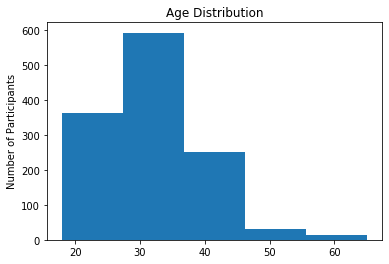

In [23]:
# Plot the age distribution
plt.hist(data['Age'].values,bins=5)
plt.title('Age Distribution')
plt.ylabel('Number of Participants')

In [24]:
#Cleaning the self_employed column
data['self_employed']=data['self_employed'].fillna('NaN')

In [25]:
# Exploring the answers to self_employed question
print("% of yes answer to self_employed:",len(data[data['self_employed']=='Yes'])/len(data))
print("% of No answer to self_employed:",len(data[data['self_employed']=='No'])/len(data))
print("% of NaN answer to self_employed:",len(data[data['self_employed']=='NaN'])/len(data))

% of yes answer to self_employed: 0.1136
% of No answer to self_employed: 0.872
% of NaN answer to self_employed: 0.0144


In [26]:
self_data=data.self_employed.value_counts()
self_data

No     1090
Yes     142
NaN      18
Name: self_employed, dtype: int64

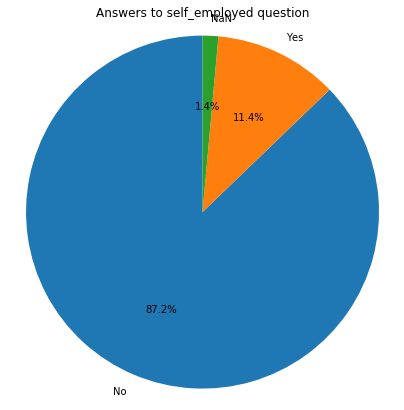

In [27]:
# Drawing a pie chart:
fig, ax=plt.subplots(figsize=(7,7))
ax.pie(self_data.values,labels=self_data.index,autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Answers to self_employed question')
plt.show()

As only a tiny fraction of answers are NaN, we replace them with 'No'.

In [28]:
data['self_employed']=data['self_employed'].replace('NaN','No')

In [29]:
#Cleaning work_interfere column
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [30]:
data['work_interfere']=data['work_interfere'].fillna('NaN')

In [31]:
# Defining a new column for future
age_range=pd.cut(data['Age'],[14,24,34,44,54,75],labels=["15-24","25-34","35-44","45-54","55-75"],include_lowest=False)
#pd.cut(x,bins,include_lowest)
#x:1D array like data
#bins:int, sequence of scalars=> Defines the bin edges allowing for non-uniform width.
#include_lowest:Whether the first interval should be left-inclusive or not.
data['Age_range']=age_range

**2.Encoding the data:**

**Most of the columns contain data in string format which cannot be used for training the models so we should encode the data first.**

In [32]:
from sklearn import preprocessing

feature_list=data.columns.tolist()
feature_list.remove('Age')

for col in feature_list:
    label=preprocessing.LabelEncoder() #  define the label object which can encode target labels with value between 0 and n_classes-1.
    label.fit(data[col])
    data[col]=label.transform(data[col])# return the labels

In [33]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,37,0,44,0,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,44,1,44,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,32,1,6,0,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,1
3,31,1,43,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,1
4,31,1,44,0,0,0,1,1,1,1,...,0,1,1,1,2,2,2,0,0,1


**3.Correlation Matrix:**
The correlation matrix is calculated to measure the correlation between each pair of features. Correlation matrix with heatmap could be used if we need feature selection as it reveals the most relevant features to the target:

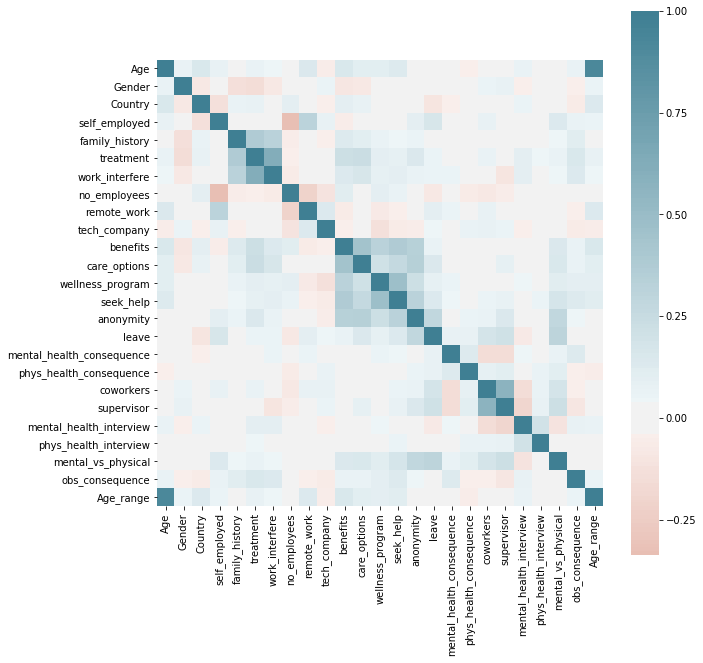

In [34]:
corr = data.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
# seaborn.heatmap(data,vmin,vmax,cmap,center,cbar,square,xticklabels, yticklabels)
#data:2D dataset
#cmap:The mapping from data values to color space.
#square:If True, set the Axes aspect to “equal” so each cell will be square-shaped.
#xticklabels, yticklabels:If True, plot the column names of the dataframe. If False, don’t plot the column names
#cmap=sns.diverging_palette(20, 220, n=200):Make a diverging palette between two HUSL colors

**Some Data Visualizations:**

In order to have a better visualization we divided the age data into 5 groups and defined a new column called Age_range. Using this feature we can plot the following graphs:

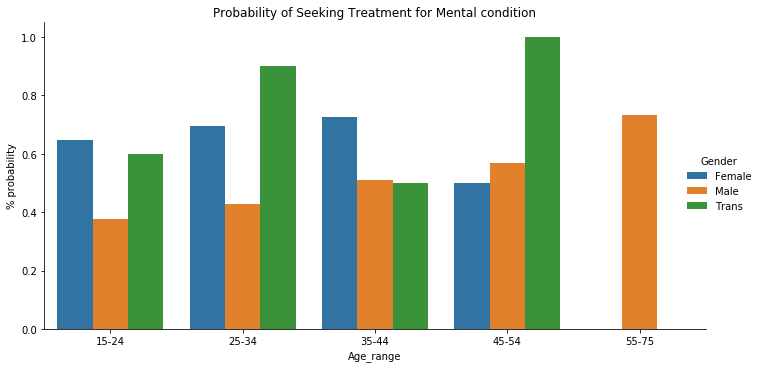

In [35]:
graph=sns.catplot(x='Age_range', y='treatment', hue='Gender', data=data, kind='bar',ci=None, aspect=2,legend=True)
#a,y,hue: name of features in the data
#data: DataFrame: each column correponds to a feature and each row shows an example
#ci: If None, no bootstrapping will be performed, and error bars will not be drawn
#legend_out:If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right.
plt.title('Probability of Seeking Treatment for Mental condition')
plt.ylabel('% probability')
graph.set_xticklabels(['15-24','25-34','35-44','45-54','55-75'])
new_legend=['Female','Male','Trans']
for t, l in zip(graph._legend.texts, new_legend): t.set_text(l)# change the initial legends (0,1,2) to new_legend.


The above graph shows the probability of seeking treatment for each age group and each sex .

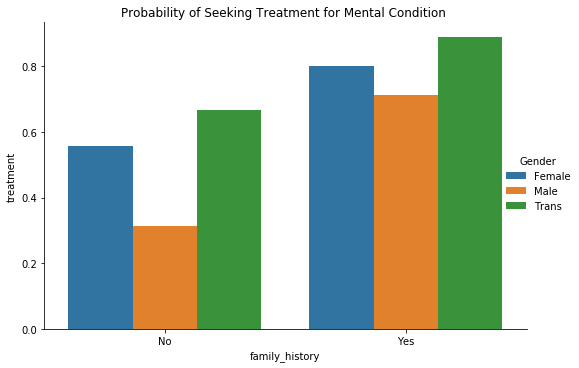

In [36]:
graph=sns.catplot(x='family_history',y='treatment',hue='Gender',data=data,kind='bar',ci=None,aspect=1.5,legend_out=True)
plt.title('Probability of Seeking Treatment for Mental Condition ')
new_legends = ['Female', 'Male','Trans']
graph.set_xticklabels(['No','Yes'])
for t, l in zip(graph._legend.texts, new_legends): t.set_text(l)


The above graph shows the probability of seeking treatment for each family history condition and each sex .

let's check the above graph with an example(first bar from the left):

In [37]:
a=len(data[(data['family_history']==0)&(data['Gender']==0)&(data['treatment']==1)])
b=len(data[(data['family_history']==0)&(data['Gender']==0)])
print(a/b)

0.5565217391304348


**4.Splitting data to train and test sets:**

In [38]:
#del data['Age_range']

In [39]:
from sklearn.model_selection import train_test_split

features=list(data.columns)
features.remove('treatment')
X=data[features]
y=data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5.Scaling:**
For some of the classification algorithms it is crucial to scale the data like K-nearest neighbor.This classifier with an Euclidean distance measure is sensitive to magnitudes so it should be scaled for all features to weigh in equally.
Graphical-model based classifiers, such as Fisher LDA or Naive Bayes, as well as Decision trees are invariant to feature scaling, but still it might be a good idea to rescale our data.

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**6.Training and Testing:**

In [41]:
# Training and Testing the model:
#==============SVC================
from sklearn import svm

svc_classifier = svm.SVC(probability=True)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)
y_prob=svc_classifier.predict_proba(X_test)

confusion matrix [[ 90  25]
 [ 19 116]]
tn: 90 
 fp: 25 
 fn: 19 
 tp: 116


Text(33.0, 0.5, 'True label')

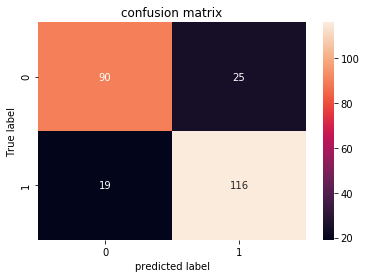

In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print('confusion matrix',confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn:',tn,'\n','fp:',fp,'\n','fn:',fn,'\n','tp:',tp)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="d")
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('True label')

accuracy: 0.824
f1: 0.841
precision: 0.823
recall: 0.859


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.89')

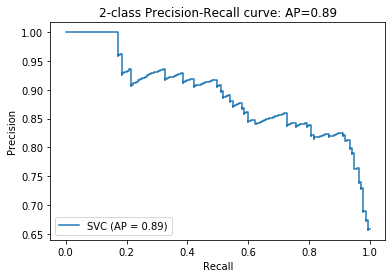

In [43]:
# Evaluation:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve

print('accuracy:','{0:0.3f}'.format(accuracy_score(y_test, y_pred)))
print('f1:','{0:0.3f}'.format(f1_score(y_test,y_pred))) # F1 score calculates the harmonic mean of the precision and recall.
print('precision:','{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('recall:','{0:0.3f}'.format(recall_score(y_test,y_pred)))

# plot the precision_recall curve
average_precision=average_precision_score(y_test,y_prob[:,1])

disp = plot_precision_recall_curve(svc_classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '+'AP={0:0.2f}'.format(average_precision))



In [44]:
#===============KNN=======================
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=35)
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)
y_prob=knn_classifier.predict_proba(X_test)

confusion matrix [[ 92  23]
 [ 31 104]]
tn: 92 
 fp: 23 
 fn: 31 
 tp: 104


Text(33.0, 0.5, 'True label')

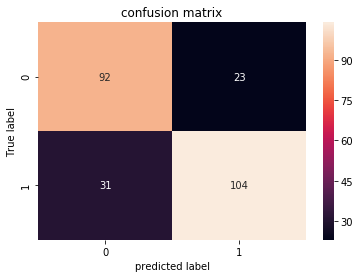

In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print('confusion matrix',confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn:',tn,'\n','fp:',fp,'\n','fn:',fn,'\n','tp:',tp)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="d")
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('True label')




accuracy: 0.784
f1: 0.794
precision: 0.819
recall: 0.770


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.87')

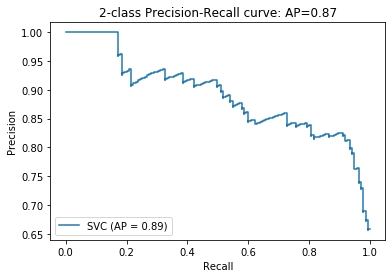

In [46]:
# Evaluation
print('accuracy:','{0:0.3f}'.format(accuracy_score(y_test, y_pred)))
print('f1:','{0:0.3f}'.format(f1_score(y_test,y_pred))) # F1 score calculates the harmonic mean of the precision and recall.
print('precision:','{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('recall:','{0:0.3f}'.format(recall_score(y_test,y_pred)))

# plot the precision_recall curve
average_precision=average_precision_score(y_test,y_prob[:,1])

disp = plot_precision_recall_curve(svc_classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '+'AP={0:0.2f}'.format(average_precision))



Precision-Recall curves summarize the trade-off between the precision and the recall for a predictive model using different probability thresholds. A high area under the curve shows high precision and high recall which is the ideal case. High precision relates to low false positives and high recall relates to low false negatives.

A system with high recall but low precision (low threshold) returns many positive results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall (high threshold) is the opposite, returning very few positive results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [47]:
#=============Logistic Regression=============
from sklearn.linear_model import LogisticRegression

log_reg_classifier=LogisticRegression(solver='lbfgs')
log_reg_classifier.fit(X_train,y_train)
y_pred=log_reg_classifier.predict(X_test)
y_prob=log_reg_classifier.predict_proba(X_test)

confusion matrix [[ 93  22]
 [ 23 112]]
tn: 93 
 fp: 22 
 fn: 23 
 tp: 112


Text(33.0, 0.5, 'True label')

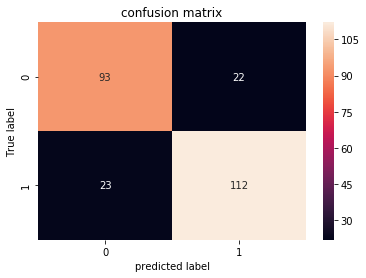

In [48]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print('confusion matrix',confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn:',tn,'\n','fp:',fp,'\n','fn:',fn,'\n','tp:',tp)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="d")
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('True label')

accuracy: 0.820
f1: 0.833
precision: 0.836
recall: 0.830


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.89')

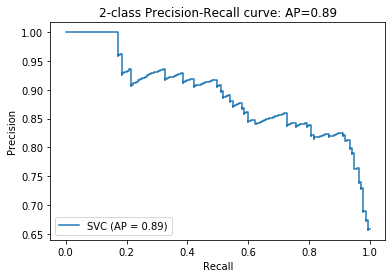

In [49]:
# Evaluating the model performance:
print('accuracy:','{0:0.3f}'.format(accuracy_score(y_test, y_pred)))
print('f1:','{0:0.3f}'.format(f1_score(y_test,y_pred))) # F1 score calculates the harmonic mean of the precision and recall.
print('precision:','{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('recall:','{0:0.3f}'.format(recall_score(y_test,y_pred)))

# plot the precision_recall curve
average_precision=average_precision_score(y_test,y_prob[:,1])

disp = plot_precision_recall_curve(svc_classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '+'AP={0:0.2f}'.format(average_precision))
